In [1]:
from sympy import Matrix, Rational

# Matriz de Hilbert 2x2
H_s = Matrix([
    [1, Rational(1, 2)], 
    [Rational(1, 2), Rational(1, 3)],
])
H_s

Matrix([
[  1, 1/2],
[1/2, 1/3]])

In [2]:
H_s.rank()

2

In [3]:
H_s.condition_number()

sqrt(2*sqrt(13)/9 + 29/36)/sqrt(29/36 - 2*sqrt(13)/9)

In [4]:
from sympy import N

N(_)

19.2814700679040

In [5]:
H_s.norm()

sqrt(58)/6

In [6]:
import scipy.linalg as la

# Matriz de Hilbert 2x2 (punto flotante)
H = la.hilbert(2)
H

array([[1.        , 0.5       ],
       [0.5       , 0.33333333]])

In [7]:
import numpy as np

np.linalg.matrix_rank(H)

2

In [8]:
np.linalg.cond(H)

19.28147006790397

In [9]:
la.norm(H)

1.2692955176439846

In [10]:
np.linalg.norm(H)

1.2692955176439846

In [11]:
L_s, U_s, P_s = H_s.LUdecomposition()
L_s

Matrix([
[  1, 0],
[1/2, 1]])

In [12]:
U_s

Matrix([
[1,  1/2],
[0, 1/12]])

In [13]:
L_s * U_s

Matrix([
[  1, 1/2],
[1/2, 1/3]])

In [14]:
P, L, U = la.lu(H)
L

array([[1. , 0. ],
       [0.5, 1. ]])

In [15]:
U

array([[1.        , 0.5       ],
       [0.        , 0.08333333]])

In [16]:
np.allclose(H - P @ L @ U, np.zeros((2,2)))

True

In [17]:
import sympy as sy

# Especificación del problema simbólico
p = sy.symbols("p", positive=True)
A_s = Matrix([[1, 1/(p + 1)], [1/(p + 1), 1/(p + 2)]])
A_cond = A_s.condition_number() # Número de condición
A_s

Matrix([
[        1, 1/(p + 1)],
[1/(p + 1), 1/(p + 2)]])

In [18]:
# Término independiente y solución analítica
b_s = Matrix([5, 3])
x_s = A_s.solve(b_s)
x_s

Matrix([
[     (2*p**2 + p - 1)/(p**2 + p - 1)],
[(3*p**3 + 7*p**2 - 4)/(p**2 + p - 1)]])

In [19]:
# Especificación del problema numérico
A_n = lambda p: np.array([[1, 1/(p + 1)], [1/(p + 1), 1/(p + 2)]])
b_n = np.array([5, 3])
x_n = lambda p: np.linalg.solve(A_n(p), b_n)

In [20]:
# Solución exacta para p = 1 (matriz de Hilbert)
x_s.subs(p, 1)

Matrix([
[2],
[6]])

In [21]:
# Solución numérica para p = 1 (matriz de Hilbert)
x_n(1)

array([2., 6.])

In [22]:
# Solución numérica usando la factorización LU
lu, piv = la.lu_factor(A_n(1))
x_lu = la.lu_solve((lu, piv), b_n)
np.allclose(A_n(1) @ x_lu - b_n, np.zeros(2))

True

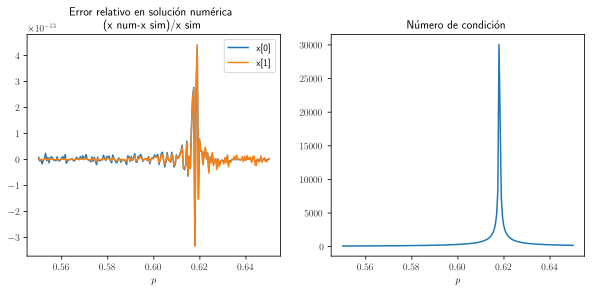

In [23]:
import matplotlib.pyplot as plt

# Gráfico de la diferencia entre las soluciones analítica (exacta) y numérica
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
p_valores = np.linspace(0.55, 0.65, 200)
for n in range(2):
    x_sim = np.array([x_s[n].subs(p, pp).evalf() for pp in p_valores])
    x_num = np.array([x_n(pp)[n] for pp in p_valores])
    ax[0].plot(p_valores, (x_num - x_sim)/x_sim, label=f'x[{n}]')

ax[0].set_title("Error relativo en solución numérica\n(x_num-x_sim)/x_sim")
ax[0].set_xlabel(r'$p$')
ax[0].legend()

ax[1].plot(p_valores, [A_cond.subs(p, pp).evalf() for pp in p_valores])
ax[1].set_title("Número de condición")
ax[1].set_xlabel(r'$p$')
plt.show()

In [24]:
import sys

print(sys.float_info.epsilon)

2.220446049250313e-16



### Copyright 2020-2024 Facundo Batista y Manuel Carlevaro

Licencia CC BY-NC-SA 4.0

Para más info visitar: https://github.com/facundobatista/libro-pyciencia/

